<a href="https://colab.research.google.com/github/abbyh1/AI-Energy-Prediction-Engine/blob/main/KPMG_1F_AI_ENERGY_Analsysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **KPMG AI ENERGY ANALYSIS**: Complete ML Pipeline
1. Data filtering and selection
2. Missing value handling
3. Feature extraction and engineering
4. Target variable creation
5. Baseline ML model
6. Model optimization
7. Feature importance analysis



In [ ]:
#1: IMPORT LIBRARIES
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import warnings
warnings.filterwarnings('ignore')

print("All libraries imported successfully!")

All libraries imported successfully!


In [ ]:
#2: LOAD DATASET
df = pd.read_csv('/content/df_481.csv')
df.head()

,Unnamed: 0,Model,GPU,Energy/video (J),Batch latency (s),Batch size,Denoising steps,Frames,file_path,ali-vilab/i2vgen-xl,...,codellama/CodeLlama-70b-hf,codellama/CodeLlama-7b-hf,google/codegemma-1.1-2b,google/codegemma-7b,facebook/chameleon-30b,facebook/chameleon-7b,llava-hf/llama3-llava-next-8b-hf,llava-hf/llava-1.5-13b-hf,llava-hf/llava-1.5-7b-hf,microsoft/Phi-3-vision-128k-instruct
0,0,ali-vilab/i2vgen-xl,NVIDIA A100-SXM4-40GB,16915.850125,46.142083,1.0,25.0,16.0,data/diffusion/image-to-video/A100-SXM4-40GB/a...,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,ali-vilab/i2vgen-xl,NVIDIA A100-SXM4-40GB,16496.045437,89.030190,2.0,25.0,16.0,data/diffusion/image-to-video/A100-SXM4-40GB/a...,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,stabilityai/stable-video-diffusion-img2vid-xt,NVIDIA A100-SXM4-40GB,15709.767625,42.397395,1.0,25.0,25.0,data/diffusion/image-to-video/A100-SXM4-40GB/s...,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,stabilityai/stable-video-diffusion-img2vid-xt,NVIDIA A100-SXM4-40GB,15291.016625,82.904748,2.0,25.0,25.0,data/diffusion/image-to-video/A100-SXM4-40GB/s...,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,stabilityai/stable-video-diffusion-img2vid-xt,NVIDIA A100-SXM4-40GB,14761.390000,120.650049,3.0,25.0,25.0,data/diffusion/image-to-video/A100-SXM4-40GB/s...,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
print(f"Dataset shape: {df.shape}")
print(f"Total rows: {df.shape[0]:,}")
print(f"Total columns: {df.shape[1]}")

Dataset shape: (481, 83)
Total rows: 481
Total columns: 83


In [ ]:
#3: EXAMINE DATA TYPES AND MISSING VALUES
print("Data Info:")
print(df.info())

Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 481 entries, 0 to 480
Data columns (total 83 columns):
 #   Column                                                         Non-Null Count  Dtype  
---  ------                                                         --------------  -----  
 0   Unnamed: 0                                                     481 non-null    int64  
 1   Model                                                          474 non-null    object 
 2   GPU                                                            474 non-null    object 
 3   Energy/video (J)                                               32 non-null     float64
 4   Batch latency (s)                                              118 non-null    float64
 5   Batch size                                                     118 non-null    float64
 6   Denoising steps                                                118 non-null    float64
 7   Frames                                             

In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 481 entries, 0 to 480
Data columns (total 83 columns):
 #   Column                                                         Non-Null Count  Dtype  
---  ------                                                         --------------  -----  
 0   Unnamed: 0                                                     481 non-null    int64  
 1   Model                                                          474 non-null    object 
 2   GPU                                                            474 non-null    object 
 3   Energy/video (J)                                               32 non-null     float64
 4   Batch latency (s)                                              118 non-null    float64
 5   Batch size                                                     118 non-null    float64
 6   Denoising steps                                                118 non-null    float64
 7   Frames                                                        

In [ ]:
## Missing Values Count
missing = df.isnull().sum()
missing_percent = (missing / len(df) * 100)
missing_df = pd.DataFrame({
    'Column': missing.index,
    'Missing_Count': missing.values,
    'Percent': missing_percent.values
}).sort_values('Missing_Count', ascending=False).head(20)
missing_df

,Column,Missing_Count,Percent
16,segmind/SSD-1B,480,99.7921
10,stabilityai/stable-video-diffusion-img2vid,480,99.7921
9,ali-vilab/i2vgen-xl,480,99.7921
18,stabilityai/stable-diffusion-2-1,480,99.7921
14,kandinsky-community/kandinsky-3,480,99.7921
13,kandinsky-community/kandinsky-2-2-decoder,480,99.7921
17,stabilityai/sdxl-turbo,480,99.7921
15,prompthero/openjourney-v4,480,99.7921
11,stabilityai/stable-video-diffusion-img2vid-xt,480,99.7921
28,camel-ai/CAMEL-13B-Combined-Data,480,99.7921


In [ ]:
# 4: STEP 1 - FILTER TO RELEVANT COLUMNS
# Select columns relevant for KPMG energy analysis
relevant_columns = [
    'Model',
    'GPU',
    'Energy/video (J)',
    'Energy/image (J)',
    'Energy/req (J)',
    'Batch latency (s)',
    'Batch size',
    'TP',
    'PP',
    'Avg TPOT (s)',
    'Token tput (tok/s)',
    'Avg Output Tokens',
    'Avg BS (reqs)',
    'Max BS (reqs)',
    'Denoising steps',
    'Frames',
    'file_path'
]

In [ ]:
# Filter only columns that exist in the dataset
existing_columns = [col for col in relevant_columns if col in df.columns]
df_filtered = df[existing_columns].copy()

In [ ]:
print(f"Filtered dataset shape: {df_filtered.shape}")
print(f"Columns selected: {len(existing_columns)}")
print(f"\nColumns in filtered dataset:")

Filtered dataset shape: (474, 26)
Columns selected: 17

Columns in filtered dataset:


In [ ]:
## Columns in filtered dataset
df_filtered.columns.tolist()

['Model',
 'GPU',
 'Energy/video (J)',
 'Energy/image (J)',
 'Energy/req (J)',
 'Batch latency (s)',
 'Batch size',
 'TP',
 'PP',
 'Avg TPOT (s)',
 'Token tput (tok/s)',
 'Avg Output Tokens',
 'Avg BS (reqs)',
 'Max BS (reqs)',
 'Denoising steps',
 'Frames',
 'file_path',
 'task_type',
 'provider',
 'model_short',
 'total_energy_j',
 'log_total_energy',
 'energy_per_batch_unit',
 'tokens_per_joule',
 'latency_per_batch',
 'gpu_tier']

In [ ]:
# 5: REMOVE ROWS WITH NO DATA
# Remove rows that are completely empty or only have file_path
rows_before = len(df_filtered)

In [ ]:
# Drop rows where all energy columns are missing
df_filtered = df_filtered.dropna(subset=['Energy/video (J)', 'Energy/image (J)', 'Energy/req (J)'], how='all')

In [ ]:
# Drop rows where Model is missing (essential identifier)
df_filtered = df_filtered.dropna(subset=['Model'])

rows_after = len(df_filtered)
rows_removed = rows_before - rows_after
df_filtered.shape

(474, 26)

In [ ]:
# CELL 6: STEP 2 - HANDLE MISSING VALUES
# Strategy: Fill energy columns with 0 (no energy = no processing of that type)
# This is appropriate since 0 means that task type didn't apply
energy_columns = ['Energy/video (J)', 'Energy/image (J)', 'Energy/req (J)']
print("Missing values in energy columns BEFORE filling:")
for col in energy_columns:
    missing_count = df_filtered[col].isnull().sum()
    print(f"  {col}: {missing_count} ({missing_count/len(df_filtered)*100:.1f}%)")

Missing values in energy columns BEFORE filling:
  Energy/video (J): 0 (0.0%)
  Energy/image (J): 0 (0.0%)
  Energy/req (J): 0 (0.0%)


In [ ]:
# Fill missing energy values with 0
df_filtered[energy_columns] = df_filtered[energy_columns].fillna(0)

print("\nMissing values in energy columns AFTER filling:")
for col in energy_columns:
    missing_count = df_filtered[col].isnull().sum()
    print(f"  {col}: {missing_count}")


Missing values in energy columns AFTER filling:
  Energy/video (J): 0
  Energy/image (J): 0
  Energy/req (J): 0


In [ ]:
# Fill other numeric columns with median (more robust than mean for outliers)
numeric_cols = df_filtered.select_dtypes(include=[np.number]).columns
for col in numeric_cols:
    if df_filtered[col].isnull().sum() > 0:
        median_val = df_filtered[col].median()
        df_filtered[col].fillna(median_val, inplace=True)
        print(f"Filled {col} with median: {median_val:.4f}")

In [ ]:
## Total missing values remaining
df_filtered.isnull().sum().sum()

np.int64(0)

In [ ]:
# 7: STEP 3 - EXTRACT TASK TYPE FROM FILE PATH
# Task types are embedded in the file path structure
def extract_task_type(file_path):
    """
    Extract task type from file path
    Examples:
    - "data/diffusion/image-to-video/..." -> "image-to-video"
    - "data/diffusion/text-to-image/..." -> "text-to-image"
    - "data/llm/..." -> "llm"
    """
    if pd.isna(file_path):
        return 'unknown'

    path_str = str(file_path)

    # Check for task type patterns in the path
    if 'image-to-video' in path_str:
        return 'image-to-video'
    elif 'text-to-image' in path_str:
        return 'text-to-image'
    elif 'text-to-video' in path_str:
        return 'text-to-video'
    elif 'text-to-speech' in path_str or 'tts' in path_str:
        return 'text-to-speech'
    elif 'llm' in path_str or 'inference' in path_str:
        return 'llm'
    elif 'vision' in path_str or 'multimodal' in path_str:
        return 'vision'
    else:
        return 'other'


In [ ]:
# Apply task type extraction
df_filtered['task_type'] = df_filtered['file_path'].apply(extract_task_type)

print("Task types extracted from file paths:")
print(df_filtered['task_type'].value_counts())

Task types extracted from file paths:
task_type
llm               356
text-to-image      86
image-to-video     16
text-to-video      16
Name: count, dtype: int64


In [ ]:
## Task type distribution
df_filtered['task_type'].value_counts(normalize=True)

,proportion
task_type,
llm,0.751055
text-to-image,0.181435
image-to-video,0.033755
text-to-video,0.033755


In [ ]:
# 8: STEP 4 - CREATE PROVIDER AND MODEL COLUMNS
# Extract provider from model name (format: "provider/model-name")
def extract_provider(model_name):
    """Extract provider (first part before slash) from model name"""
    if pd.isna(model_name):
        return 'unknown'

    model_str = str(model_name)
    if '/' in model_str:
        provider = model_str.split('/')[0]
        return provider
    else:
        return 'unknown'

In [ ]:
# Apply provider and model extraction
df_filtered['provider'] = df_filtered['Model'].apply(extract_provider)
print("Providers identified:")
print(df_filtered['provider'].value_counts())

Providers identified:
provider
mistralai              82
google                 76
stabilityai            56
codellama              49
bigcode                40
microsoft              37
meta-llama             36
llava-hf               23
kandinsky-community    19
ali-vilab              14
prompthero             14
facebook               13
segmind                 9
guoyww                  6
Name: count, dtype: int64


In [ ]:
def extract_model_short(model_name):
    """Extract model short name (second part after slash)"""
    if pd.isna(model_name):
        return 'unknown'

    model_str = str(model_name)
    if '/' in model_str:
        model = model_str.split('/')[-1]
        return model
    else:
        return model_str

In [ ]:
df_filtered['model_short'] = df_filtered['Model'].apply(extract_model_short)
print(f"\nTotal unique models: {df_filtered['model_short'].nunique()}")
print("Top 10 models:")
print(df_filtered['model_short'].value_counts().head(10))


Total unique models: 42
Top 10 models:
model_short
Mixtral-8x22B-Instruct-v0.1    23
codegemma-1.1-2b               19
Mixtral-8x7B-Instruct-v0.1     18
Meta-Llama-3.1-70B-Instruct    16
Mistral-7B-Instruct-v0.3       15
Mistral-Large-Instruct-2407    15
gemma-2-2b-it                  15
codegemma-7b                   15
openjourney-v4                 14
Phi-3-small-8k-instruct        14
Name: count, dtype: int64


In [ ]:
# 9: STEP 5A - CREATE CONSOLIDATED ENERGY COLUMN
# Combine all energy measurements into total energy consumption

## Energy Consumption Statistics (in Joules)
df_filtered['Energy/video (J)'].describe()

,Energy/video (J)
count,474.000000
mean,478.415905
std,2330.397369
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,16915.850125


In [ ]:
## Energy/image (J)
df_filtered['Energy/image (J)'].describe()

,Energy/image (J)
count,474.000000
mean,92.325361
std,254.187457
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1457.979700


In [ ]:
## Energy/req (J):
df_filtered['Energy/req (J)'].describe()

,Energy/req (J)
count,474.000000
mean,159.747319
std,342.854149
min,0.000000
25%,5.619904
50%,49.172031
75%,136.317101
max,3352.922461


In [ ]:
# Check which energy columns have values
print("Energy column value presence:")
print(f"Energy/video non-zero: {(df_filtered['Energy/video (J)'] > 0).sum():,}")
print(f"Energy/image non-zero: {(df_filtered['Energy/image (J)'] > 0).sum():,}")
print(f"Energy/req non-zero: {(df_filtered['Energy/req (J)'] > 0).sum():,}")

Energy column value presence:
Energy/video non-zero: 32
Energy/image non-zero: 86
Energy/req non-zero: 356


In [ ]:
# 10: STEP 5B - CREATE TOTAL ENERGY COLUMN
# Sum all energy types to create total energy per inference task
df_filtered['total_energy_j'] = (
    df_filtered['Energy/video (J)'] +
    df_filtered['Energy/image (J)'] +
    df_filtered['Energy/req (J)']
)

In [ ]:
## Total Energy Column Created
df_filtered['total_energy_j'].describe()

,total_energy_j
count,474.000000
mean,730.488585
std,2311.201253
min,5.607688
25%,49.132126
50%,132.451500
75%,440.423376
max,16915.850125


In [ ]:
## 11: STEP 5C - LOG TRANSFORM ENERGY (FOR BETTER ML)
# Many ML models perform better with log-transformed targets

# Handle zero values by adding small constant before log
epsilon = 1e-6
df_filtered['log_total_energy'] = np.log(df_filtered['total_energy_j'] + epsilon)

In [ ]:
## Total log Energy Column Created
df_filtered['log_total_energy'].describe()

,log_total_energy
count,474.000000
mean,4.964886
std,1.655963
min,1.724139
25%,3.894512
50%,4.886180
75%,6.087735
max,9.736006


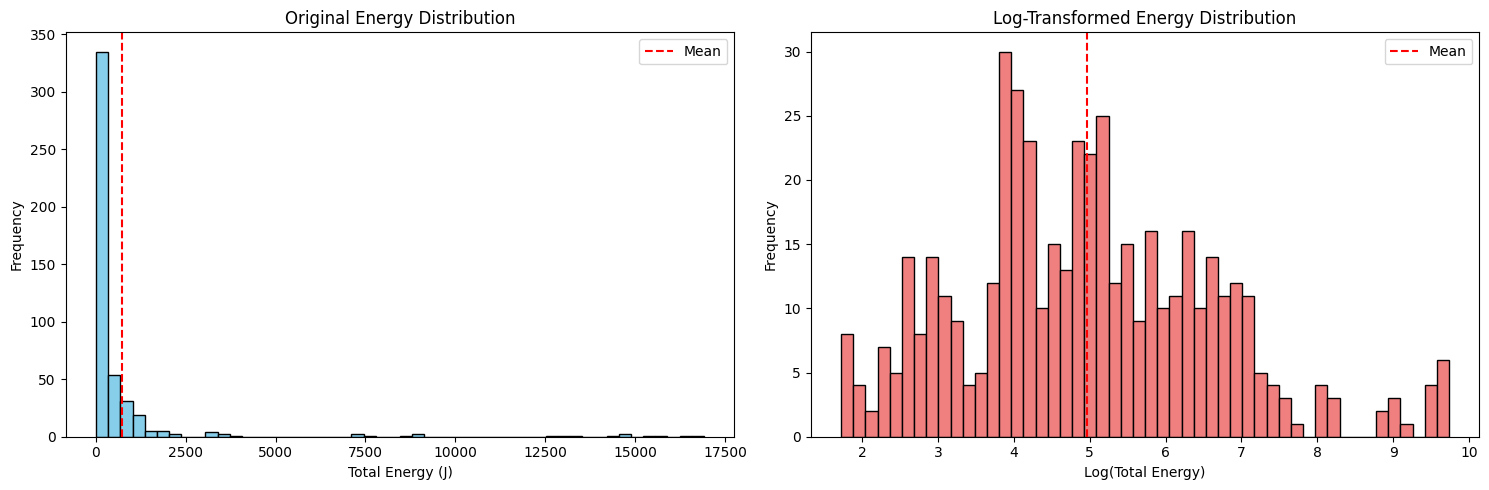

In [ ]:
# 12: VISUALIZE TARGET DISTRIBUTIONS
# Compare original vs log-transformed energy distribution

plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
plt.hist(df_filtered['total_energy_j'], bins=50, edgecolor='black', color='skyblue')
plt.xlabel('Total Energy (J)')
plt.ylabel('Frequency')
plt.title('Original Energy Distribution')
plt.axvline(df_filtered['total_energy_j'].mean(), color='red', linestyle='--', label='Mean')
plt.legend()

plt.subplot(1, 2, 2)
plt.hist(df_filtered['log_total_energy'], bins=50, edgecolor='black', color='lightcoral')
plt.xlabel('Log(Total Energy)')
plt.ylabel('Frequency')
plt.title('Log-Transformed Energy Distribution')
plt.axvline(df_filtered['log_total_energy'].mean(), color='red', linestyle='--', label='Mean')
plt.legend()

plt.tight_layout()
plt.savefig('energy_distributions.png', dpi=100, bbox_inches='tight')
plt.show()

In [ ]:
# 13: STEP 6A - FEATURE ENGINEERING: TASK-LEVEL FEATURES
# Create new meaningful features from existing data

# Energy efficiency: energy per batch
df_filtered['energy_per_batch_unit'] = df_filtered['total_energy_j'] / (df_filtered['Batch size'] + 1)

# Throughput metrics (for LLM tasks)
df_filtered['tokens_per_joule'] = np.where(
    df_filtered['total_energy_j'] > 0,
    df_filtered['Token tput (tok/s)'] / df_filtered['total_energy_j'],
    0
)

# Latency per batch unit
df_filtered['latency_per_batch'] = df_filtered['Batch latency (s)'] / (df_filtered['Batch size'] + 1)

# Check if GPU is high-end (A100, H100) vs standard
def gpu_tier(gpu_name):
    """Classify GPU into tiers"""
    if pd.isna(gpu_name):
        return 'unknown'

    gpu_str = str(gpu_name).lower()
    if 'h100' in gpu_str:
        return 'flagship'
    elif 'a100' in gpu_str:
        return 'enterprise'
    elif 'a40' in gpu_str or 'a30' in gpu_str:
        return 'mid-range'
    elif 'v100' in gpu_str or 't4' in gpu_str:
        return 'entry'
    else:
        return 'other'

df_filtered['gpu_tier'] = df_filtered['GPU'].apply(gpu_tier)

print("GPU tier classification:")
df_filtered['gpu_tier'].value_counts()

GPU tier classification:


,count
gpu_tier,
enterprise,244
flagship,230


In [ ]:
# Parallelism indicator (for LLM tasks)
df_filtered['has_parallelism'] = ((df_filtered['TP'] > 1) | (df_filtered['PP'] > 1)).astype(int)

print("\nNew features created:")
print(f"energy_per_batch_unit - min: {df_filtered['energy_per_batch_unit'].min():.2f}, max: {df_filtered['energy_per_batch_unit'].max():.2f}")
print(f"latency_per_batch - min: {df_filtered['latency_per_batch'].min():.4f}, max: {df_filtered['latency_per_batch'].max():.4f}")
print(f"has_parallelism - distribution: {df_filtered['has_parallelism'].value_counts().to_dict()}")


New features created:
energy_per_batch_unit - min: 1.12, max: 8457.93
latency_per_batch - min: 0.1857, max: 30.1625
has_parallelism - distribution: {0: 310, 1: 164}


In [ ]:
# 14: STEP 6B - FEATURE ENGINEERING: ONE-HOT ENCODING
# Convert categorical variables to numeric format

# One-hot encode categorical features
categorical_features = ['task_type', 'gpu_tier', 'GPU', 'provider']

df_encoded = df_filtered.copy()

for cat_feature in categorical_features:
    if cat_feature in df_encoded.columns:
        # Create one-hot encoded columns
        one_hot = pd.get_dummies(df_encoded[cat_feature], prefix=cat_feature, drop_first=True)
        df_encoded = pd.concat([df_encoded, one_hot], axis=1)
        print(f"Created {len(one_hot.columns)} dummy variables for {cat_feature}")

Created 3 dummy variables for task_type
Created 1 dummy variables for gpu_tier
Created 1 dummy variables for GPU
Created 13 dummy variables for provider


In [ ]:
# 15: PREPARE DATA FOR MODELING
# Select features for the model and prepare train/test split

# Identify all numeric features (excluding target and original energy columns)
exclude_cols = [
    'Model',
    'file_path',
    'Energy/video (J)',
    'Energy/image (J)',
    'Energy/req (J)',
    'total_energy_j',
    'log_total_energy',
    'model_short'
]

feature_cols = [col for col in df_encoded.columns
                if col not in exclude_cols
                and df_encoded[col].dtype in [np.float64, np.int64, np.int32]]

print(f"Total features selected: {len(feature_cols)}")
print(f"\nFeature columns:")
print(feature_cols)

Total features selected: 15

Feature columns:
['Batch latency (s)', 'Batch size', 'TP', 'PP', 'Avg TPOT (s)', 'Token tput (tok/s)', 'Avg Output Tokens', 'Avg BS (reqs)', 'Max BS (reqs)', 'Denoising steps', 'Frames', 'energy_per_batch_unit', 'tokens_per_joule', 'latency_per_batch', 'has_parallelism']


In [ ]:
# Create feature matrix and target
X = df_encoded[feature_cols].copy()
y = df_encoded['log_total_energy'].copy()  # Using log-transformed target

# Remove any remaining missing values
X_clean = X.dropna()
y_clean = y[X_clean.index]

print(f"\nFinal dataset shape: X={X_clean.shape}, y={y_clean.shape}")


Final dataset shape: X=(474, 15), y=(474,)


In [ ]:
# 16: SPLIT DATA INTO TRAIN AND TEST SETS
# 80% training, 20% testing with random seed for reproducibility

X_train, X_test, y_train, y_test = train_test_split(
    X_clean, y_clean,
    test_size=0.2,
    random_state=42
)

print(f"Training set: {X_train.shape[0]:,} samples")
print(f"Test set: {X_test.shape[0]:,} samples")
print(f"Features: {X_train.shape[1]}")

Training set: 379 samples
Test set: 95 samples
Features: 14


In [ ]:
# 17: SCALE FEATURES
# Standardize features to have mean=0 and std=1
# Important for tree-based models and ensures fair feature importance

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Features scaled successfully")
print(f"Training set - Mean: {X_train_scaled.mean(axis=0).mean():.6f}, Std: {X_train_scaled.std(axis=0).mean():.4f}")
print(f"Test set - Mean: {X_test_scaled.mean(axis=0).mean():.6f}, Std: {X_test_scaled.std(axis=0).mean():.4f}")

Features scaled successfully
Training set - Mean: -0.000000, Std: 0.9286
Test set - Mean: -0.058523, Std: 0.8455


In [ ]:
# 18: STEP 8A - BUILD BASELINE MODEL: DECISION TREE
# Simple baseline model for comparison

dt_model = DecisionTreeRegressor(
    max_depth=5,
    min_samples_split=10,
    min_samples_leaf=5,
    random_state=42
)

dt_model.fit(X_train_scaled, y_train)
dt_pred_train = dt_model.predict(X_train_scaled)
dt_pred_test = dt_model.predict(X_test_scaled)

dt_r2_train = r2_score(y_train, dt_pred_train)
dt_r2_test = r2_score(y_test, dt_pred_test)
dt_mae = mean_absolute_error(y_test, dt_pred_test)
dt_rmse = np.sqrt(mean_squared_error(y_test, dt_pred_test))

print(f"Training R²: {dt_r2_train:.4f}")
print(f"Test R²: {dt_r2_test:.4f}")
print(f"Test MAE: {dt_mae:.4f}")
print(f"Test RMSE: {dt_rmse:.4f}")
print(f"Overfitting indicator (Train - Test): {(dt_r2_train - dt_r2_test):.4f}")

Training R²: 0.9882
Test R²: 0.9744
Test MAE: 0.1864
Test RMSE: 0.2656
Overfitting indicator (Train - Test): 0.0138


In [ ]:
# 19: BUILD SECOND BASELINE: RANDOM FOREST
# More sophisticated baseline using ensemble method

rf_model = RandomForestRegressor(
    n_estimators=100,
    max_depth=10,
    min_samples_split=10,
    min_samples_leaf=5,
    random_state=42,
    n_jobs=-1
)

rf_model.fit(X_train_scaled, y_train)
rf_pred_train = rf_model.predict(X_train_scaled)
rf_pred_test = rf_model.predict(X_test_scaled)

rf_r2_train = r2_score(y_train, rf_pred_train)
rf_r2_test = r2_score(y_test, rf_pred_test)
rf_mae = mean_absolute_error(y_test, rf_pred_test)
rf_rmse = np.sqrt(mean_squared_error(y_test, rf_pred_test))

print(f"Training R²: {rf_r2_train:.4f}")
print(f"Test R²: {rf_r2_test:.4f}")
print(f"Test MAE: {rf_mae:.4f}")
print(f"Test RMSE: {rf_rmse:.4f}")
print(f"Overfitting indicator (Train - Test): {(rf_r2_train - rf_r2_test):.4f}")

Training R²: 0.9964
Test R²: 0.9926
Test MAE: 0.0918
Test RMSE: 0.1432
Overfitting indicator (Train - Test): 0.0039


In [ ]:
# 20: CROSS-VALIDATION FOR MODEL STABILITY
# Use 5-fold cross-validation to ensure model performance is stable

cv_scores_dt = cross_val_score(dt_model, X_train_scaled, y_train, cv=5, scoring='r2')
cv_scores_rf = cross_val_score(rf_model, X_train_scaled, y_train, cv=5, scoring='r2')

print("\nDecision Tree CV R² Scores:")
print(f"  Fold scores: {cv_scores_dt.round(4)}")
print(f"  Mean: {cv_scores_dt.mean():.4f} (+/- {cv_scores_dt.std():.4f})")

print("\nRandom Forest CV R² Scores:")
print(f"  Fold scores: {cv_scores_rf.round(4)}")
print(f"  Mean: {cv_scores_rf.mean():.4f} (+/- {cv_scores_rf.std():.4f})")


Decision Tree CV R² Scores:
  Fold scores: [0.9664 0.9692 0.9715 0.973  0.9753]
  Mean: 0.9711 (+/- 0.0031)

Random Forest CV R² Scores:
  Fold scores: [0.9769 0.9875 0.9924 0.9874 0.9932]
  Mean: 0.9875 (+/- 0.0058)


In [ ]:
# 21: STEP 9A - OPTIMIZE: XGBOOST MODEL
# Advanced optimization using XGBoost (gradient boosting)

xgb_model = XGBRegressor(
    objective='reg:squarederror',
    n_estimators=200,
    max_depth=7,
    learning_rate=0.05,
    subsample=0.8,
    colsample_bytree=0.8,
    min_child_weight=3,
    random_state=42,
    n_jobs=-1,
    verbosity=0
)

xgb_model.fit(X_train_scaled, y_train)
xgb_pred_train = xgb_model.predict(X_train_scaled)
xgb_pred_test = xgb_model.predict(X_test_scaled)

xgb_r2_train = r2_score(y_train, xgb_pred_train)
xgb_r2_test = r2_score(y_test, xgb_pred_test)
xgb_mae = mean_absolute_error(y_test, xgb_pred_test)
xgb_rmse = np.sqrt(mean_squared_error(y_test, xgb_pred_test))

print(f"Training R²: {xgb_r2_train:.4f}")
print(f"Test R²: {xgb_r2_test:.4f}")
print(f"Test MAE: {xgb_mae:.4f}")
print(f"Test RMSE: {xgb_rmse:.4f}")
print(f"Overfitting indicator (Train - Test): {(xgb_r2_train - xgb_r2_test):.4f}")

Training R²: 0.9999
Test R²: 0.9968
Test MAE: 0.0673
Test RMSE: 0.0946
Overfitting indicator (Train - Test): 0.0032


In [ ]:
# CELL 22: MODEL COMPARISON SUMMARY
# Create comprehensive comparison of all three models

model_comparison = pd.DataFrame({
    'Model': ['Decision Tree', 'Random Forest', 'XGBoost'],
    'Train_R2': [dt_r2_train, rf_r2_train, xgb_r2_train],
    'Test_R2': [dt_r2_test, rf_r2_test, xgb_r2_test],
    'MAE': [dt_mae, rf_mae, xgb_mae],
    'RMSE': [dt_rmse, rf_rmse, xgb_rmse]
})

print(model_comparison.round(4))

best_model_idx = model_comparison['Test_R2'].idxmax()
best_model_name = model_comparison.loc[best_model_idx, 'Model']
best_r2 = model_comparison.loc[best_model_idx, 'Test_R2']

print(f"\n✓ Best Performing Model: {best_model_name}")
print(f"✓ Test R² Score: {best_r2:.4f}")
print(f"✓ Explains {best_r2*100:.1f}% of variance in energy consumption")

           Model  Train_R2  Test_R2     MAE    RMSE
0  Decision Tree    0.9882   0.9744  0.1864  0.2656
1  Random Forest    0.9964   0.9926  0.0918  0.1432
2        XGBoost    0.9999   0.9968  0.0673  0.0946

✓ Best Performing Model: XGBoost
✓ Test R² Score: 0.9968
✓ Explains 99.7% of variance in energy consumption


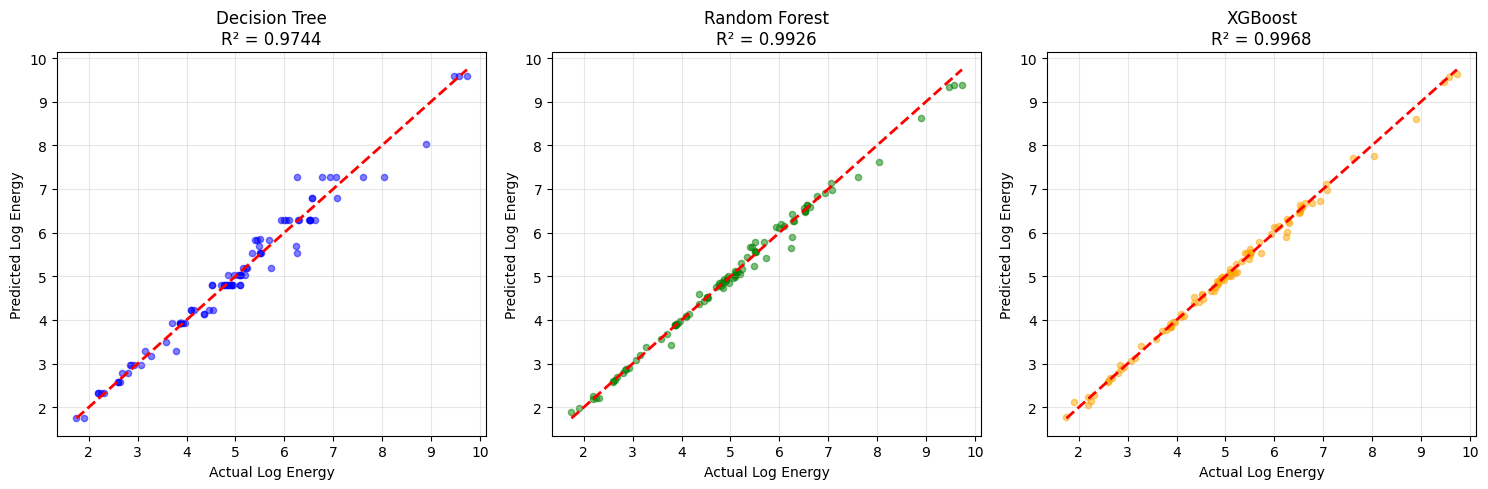

In [ ]:
# 23: VISUALIZE MODEL PERFORMANCE: ACTUAL VS PREDICTED
# Compare predicted vs actual energy consumption

plt.figure(figsize=(15, 5))

# Decision Tree
plt.subplot(1, 3, 1)
plt.scatter(y_test, dt_pred_test, alpha=0.5, s=20, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Log Energy')
plt.ylabel('Predicted Log Energy')
plt.title(f'Decision Tree\nR² = {dt_r2_test:.4f}')
plt.grid(True, alpha=0.3)

# Random Forest
plt.subplot(1, 3, 2)
plt.scatter(y_test, rf_pred_test, alpha=0.5, s=20, color='green')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Log Energy')
plt.ylabel('Predicted Log Energy')
plt.title(f'Random Forest\nR² = {rf_r2_test:.4f}')
plt.grid(True, alpha=0.3)

# XGBoost
plt.subplot(1, 3, 3)
plt.scatter(y_test, xgb_pred_test, alpha=0.5, s=20, color='orange')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Log Energy')
plt.ylabel('Predicted Log Energy')
plt.title(f'XGBoost\nR² = {xgb_r2_test:.4f}')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('model_predictions_comparison.png', dpi=100, bbox_inches='tight')
plt.show()

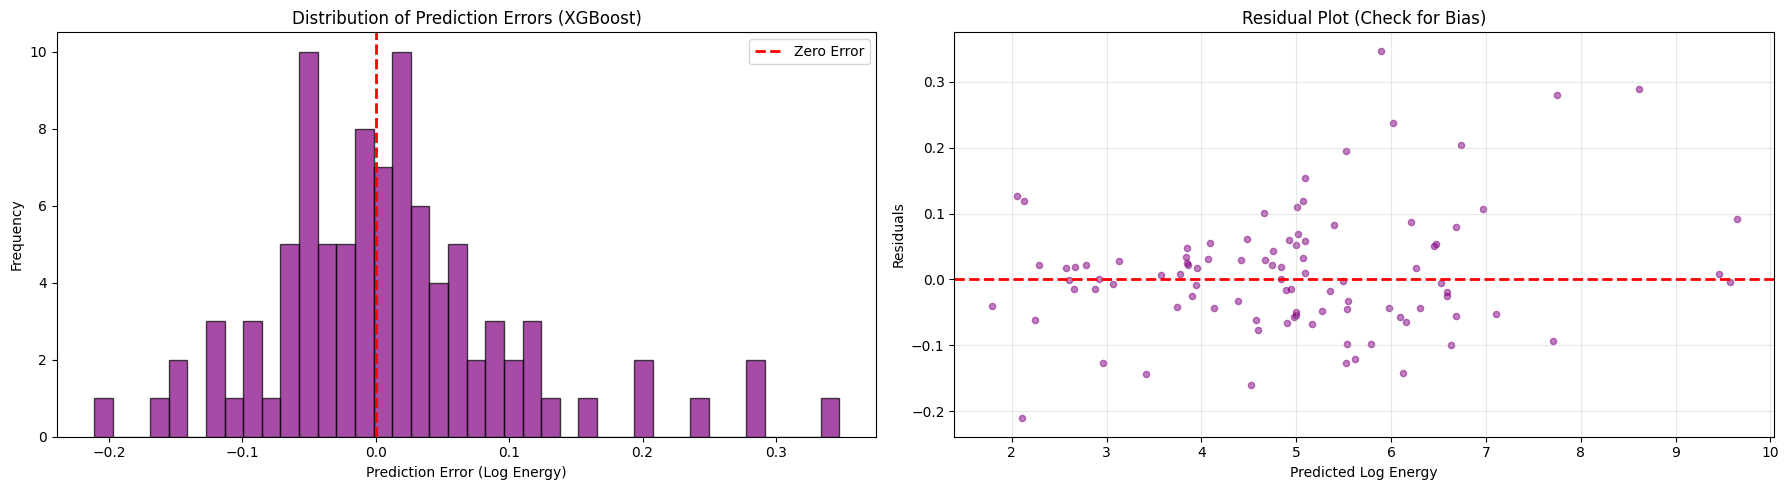

In [ ]:
# CELL 24: ANALYZE PREDICTION ERRORS
# Understand where the best model makes errors

best_residuals = y_test.values - xgb_pred_test
best_abs_errors = np.abs(best_residuals)

plt.figure(figsize=(18, 5))

# Histogram of residuals
plt.subplot(1, 2, 1)
plt.hist(best_residuals, bins=40, edgecolor='black', color='purple', alpha=0.7)
plt.xlabel('Prediction Error (Log Energy)')
plt.ylabel('Frequency')
plt.title('Distribution of Prediction Errors (XGBoost)')
plt.axvline(0, color='red', linestyle='--', lw=2, label='Zero Error')
plt.legend()

# Residuals vs Predicted
plt.subplot(1, 2, 2)
plt.scatter(xgb_pred_test, best_residuals, alpha=0.5, s=20, color='purple')
plt.axhline(0, color='red', linestyle='--', lw=2)
plt.xlabel('Predicted Log Energy')
plt.ylabel('Residuals')
plt.title('Residual Plot (Check for Bias)')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

In [ ]:
print("\nResidual Analysis (XGBoost):")
print(f"Mean residual: {best_residuals.mean():.6f} (should be near 0)")
print(f"Std dev of residuals: {best_residuals.std():.4f}")
print(f"Max absolute error: {best_abs_errors.max():.4f} log units")
print(f"Median absolute error: {np.median(best_abs_errors):.4f} log units")


Residual Analysis (XGBoost):
Mean residual: 0.010725 (should be near 0)
Std dev of residuals: 0.0940
Max absolute error: 0.3474 log units
Median absolute error: 0.0501 log units


In [ ]:
# 25: STEP 10 - EXTRACT FEATURE IMPORTANCE
# Identify which features drive energy consumption predictions

# Get feature importance from XGBoost
feature_importance_values = xgb_model.feature_importances_

# Create dataframe of feature importance
# Ensure feature_cols matches the actual features used for training
# X_train.columns provides the actual feature names corresponding to the trained model
feature_importance_df = pd.DataFrame({
    'Feature': X_train.columns.tolist(),
    'Importance': feature_importance_values
}).sort_values('Importance', ascending=False)

In [ ]:

print(f"\nTotal features: {len(feature_importance_df)}")
print(f"Cumulative importance (top 10): {feature_importance_df.head(10)['Importance'].sum():.4f}")
print(f"Cumulative importance (top 20): {feature_importance_df.head(20)['Importance'].sum():.4f}")


Total features: 14
Cumulative importance (top 10): 0.9976
Cumulative importance (top 20): 1.0000


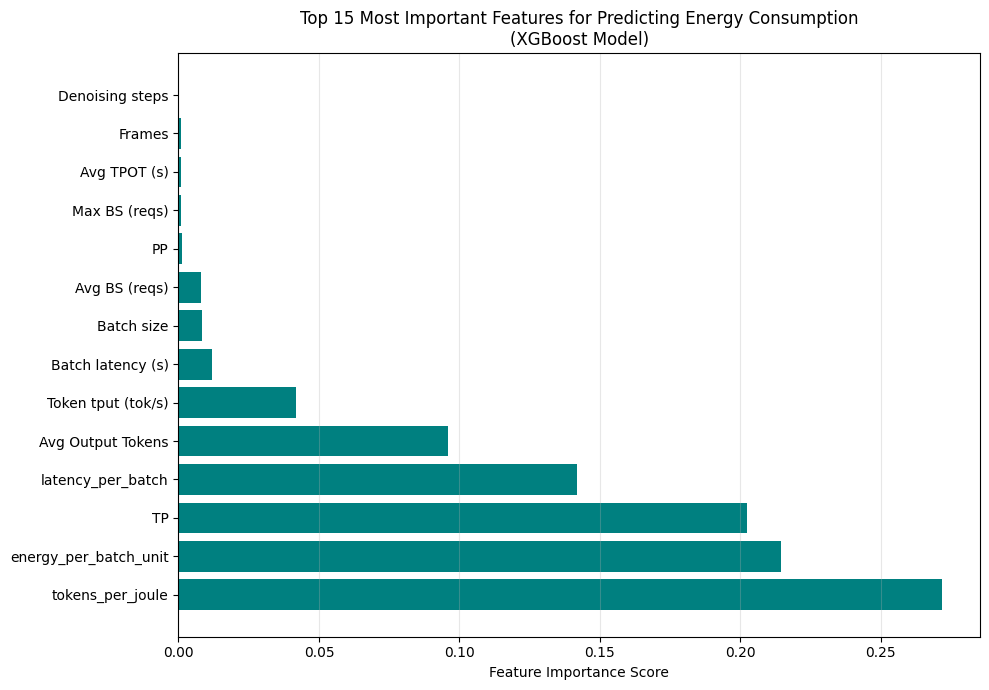

In [ ]:
# 26: VISUALIZE TOP FEATURES
# Bar chart of top 15 most important features

top_features = feature_importance_df.head(15)

plt.figure(figsize=(10, 7))
plt.barh(range(len(top_features)), top_features['Importance'], color='teal')
plt.yticks(range(len(top_features)), top_features['Feature'])
plt.xlabel('Feature Importance Score')
plt.title('Top 15 Most Important Features for Predicting Energy Consumption\n(XGBoost Model)')
plt.grid(True, alpha=0.3, axis='x')
plt.tight_layout()
plt.savefig('feature_importance_top15.png', dpi=100, bbox_inches='tight')
plt.show()

In [ ]:
#  27: BUSINESS INSIGHTS - ENERGY ANALYSIS BY TASK TYPE
# Segment analysis for KPMG stakeholders

energy_by_task = df_filtered.groupby('task_type').agg({
    'total_energy_j': ['mean', 'median', 'min', 'max', 'std'],
    'Batch size': 'mean',
    'Batch latency (s)': 'mean'
}).round(2)

print("\nEnergy Profile by Task Type:")
energy_by_task


Energy Profile by Task Type:


total_energy_j                                        \
                         mean    median      min       max      std   
task_type                                                             
image-to-video       12278.39  13147.32  7354.00  16915.85  3500.90   
llm                    212.70     71.40     5.61   3352.92   381.22   
text-to-image          508.86    343.57   128.09   1457.98   380.90   
text-to-video         1894.68   1064.04   812.81   3808.39  1260.00   

               Batch size Batch latency (s)  
                     mean              mean  
task_type                                    
image-to-video       1.88             48.90  
llm                  4.00              6.22  
text-to-image       11.40              7.24  
text-to-video        4.75             14.01

In [ ]:
# 28: BUSINESS INSIGHTS - ENERGY ANALYSIS BY GPU efficiency comparison
# Re-create 'gpu_tier' if it's missing (due to earlier execution issues)
if 'gpu_tier' not in df_filtered.columns:
    print("Warning: 'gpu_tier' column not found, attempting to re-create it.")
    # Full definition of gpu_tier function
    def gpu_tier(gpu_name):
        """Classify GPU into tiers"""
        if pd.isna(gpu_name):
            return 'unknown'

        gpu_str = str(gpu_name).lower()
        if 'h100' in gpu_str:
            return 'flagship'
        elif 'a100' in gpu_str:
            return 'enterprise'
        elif 'a40' in gpu_str or 'a30' in gpu_str:
            return 'mid-range'
        elif 'v100' in gpu_str or 't4' in gpu_str:
            return 'entry'
        else:
            return 'other'

    df_filtered['gpu_tier'] = df_filtered['GPU'].apply(gpu_tier)
    print(" 'gpu_tier' column re-created successfully.")


energy_by_gpu = df_filtered.groupby('gpu_tier').agg({
    'total_energy_j': ['mean', 'median', 'count'],
    'Batch latency (s)': 'mean'
}).round(2)

print("\nEnergy Profile by GPU Tier:")
energy_by_gpu


Energy Profile by GPU Tier:


total_energy_j               Batch latency (s)
                     mean  median count              mean
gpu_tier                                                 
enterprise         739.45  138.75   244              8.81
flagship           720.98  129.08   230              7.37

## MODEL PERFORMANCE COMPARISON PLOTS

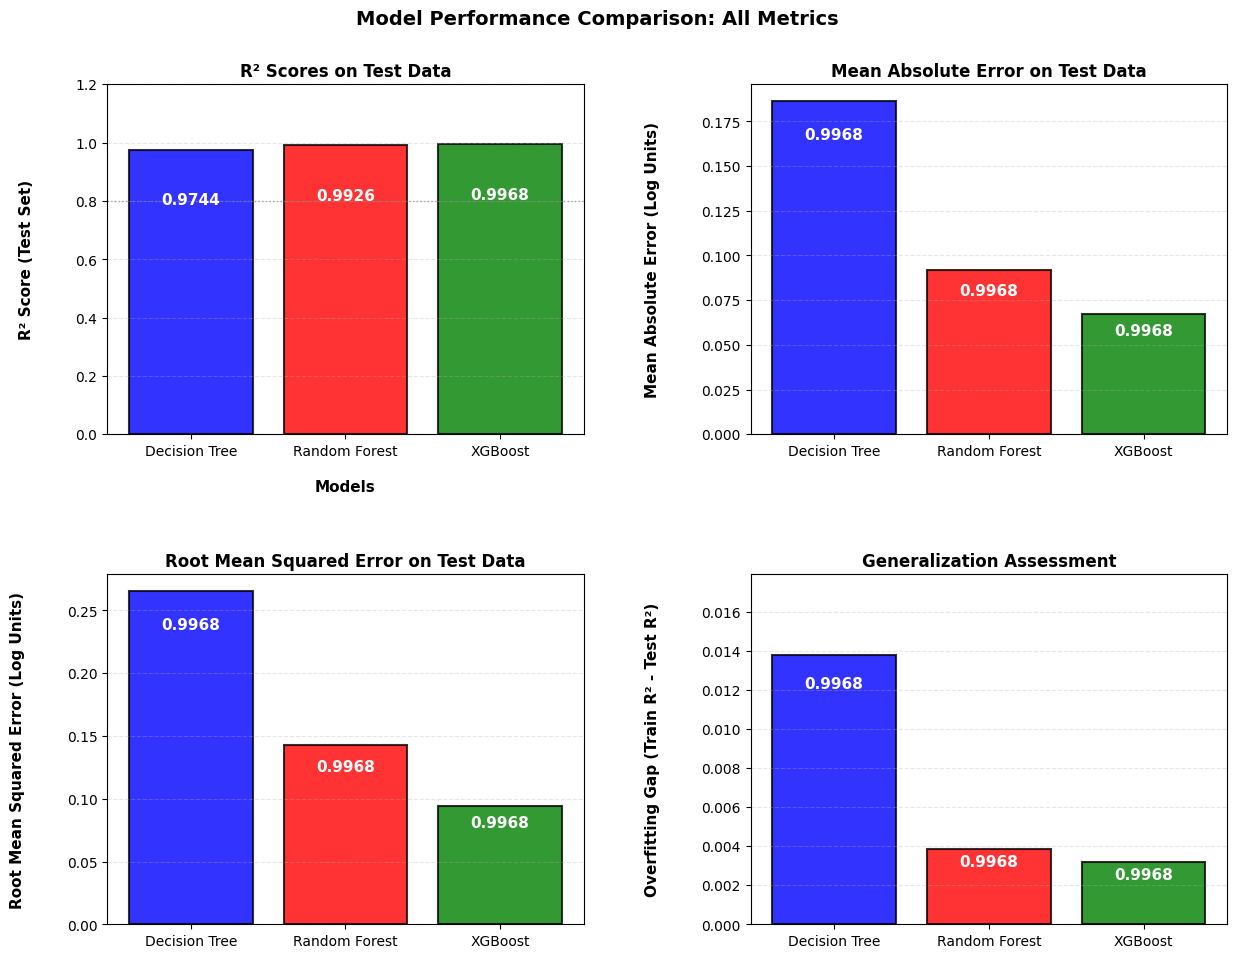

In [ ]:
# PLOT 1: MODEL COMPARISON - ALL METRICS IN ONE FIGURE
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle('Model Performance Comparison: All Metrics', fontsize=14, fontweight='bold', y=0.995)

models = ['Decision Tree', 'Random Forest', 'XGBoost']
colors = ['blue', 'red', 'green']

# Subplot 1: R² Scores
ax = axes[0, 0]
r2_scores = [dt_r2_test, rf_r2_test, xgb_r2_test]
bars = ax.bar(models, r2_scores, color=colors, edgecolor='black', linewidth=1.5, alpha=0.8)
for bar, score in zip(bars, r2_scores):
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height * .85,
        f'{score:.4f}', ha='center', va='top', fontsize=11, fontweight='bold', color='white')
ax.set_ylabel('R² Score (Test Set)', fontsize=11, fontweight='bold', labelpad=30)
ax.set_title('R² Scores on Test Data', fontsize=12, fontweight='bold')
ax.set_xlabel('Models', fontsize=11, fontweight='bold', labelpad=15)
ax.set_ylim(0, 1.2)
ax.grid(axis='y', alpha=0.3, linestyle='--')
ax.axhline(y=0.80, color='gray', linestyle=':', linewidth=1, alpha=0.7)

# Subplot 2: MAE
ax = axes[0, 1]
mae_values = [dt_mae, rf_mae, xgb_mae]
bars = ax.bar(models, mae_values, color=colors, edgecolor='black', linewidth=1.5, alpha=0.8)
for bar, mae in zip(bars, mae_values):
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height * 0.92,
        f'{score:.4f}', ha='center', va='top', fontsize=11, fontweight='bold', color='white')
ax.set_ylabel('Mean Absolute Error (Log Units)', fontsize=11, fontweight='bold', labelpad=30)
ax.set_title('Mean Absolute Error on Test Data', fontsize=12, fontweight='bold')
ax.grid(axis='y', alpha=0.3, linestyle='--')

# Subplot 3: RMSE
ax = axes[1, 0]
rmse_values = [dt_rmse, rf_rmse, xgb_rmse]
bars = ax.bar(models, rmse_values, color=colors, edgecolor='black', linewidth=1.5, alpha=0.8)
for bar, rmse in zip(bars, rmse_values):
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height * 0.92,
        f'{score:.4f}', ha='center', va='top', fontsize=11, fontweight='bold', color='white')
ax.set_ylabel('Root Mean Squared Error (Log Units)', fontsize=11, fontweight='bold', labelpad=30)
ax.set_title('Root Mean Squared Error on Test Data', fontsize=12, fontweight='bold')
ax.grid(axis='y', alpha=0.3, linestyle='--')

# Subplot 4: Overfitting Gap
ax = axes[1, 1]
overfitting_gap = [dt_r2_train - dt_r2_test, rf_r2_train - rf_r2_test, xgb_r2_train - xgb_r2_test]
bars = ax.bar(models, overfitting_gap, color=colors, edgecolor='black', linewidth=1.5, alpha=0.8)
for bar, gap in zip(bars, overfitting_gap):
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height * 0.92,
        f'{score:.4f}', ha='center', va='top', fontsize=11, fontweight='bold', color='white')
ax.set_ylabel('Overfitting Gap (Train R² - Test R²)', fontsize=11, fontweight='bold', labelpad=30)
ax.set_title('Generalization Assessment', fontsize=12, fontweight='bold')
ax.axhline(y=0.05, color='green', linestyle='--', linewidth=1.5, alpha=0.7)
ax.axhline(y=0.10, color='orange', linestyle='--', linewidth=1.5, alpha=0.7)
ax.grid(axis='y', alpha=0.3, linestyle='--')
ax.set_ylim(0, max(overfitting_gap) * 1.3)

plt.subplots_adjust(left=0.15, right=0.95, top=0.92, bottom=0.08, hspace=0.4, wspace=0.35)
plt.show()

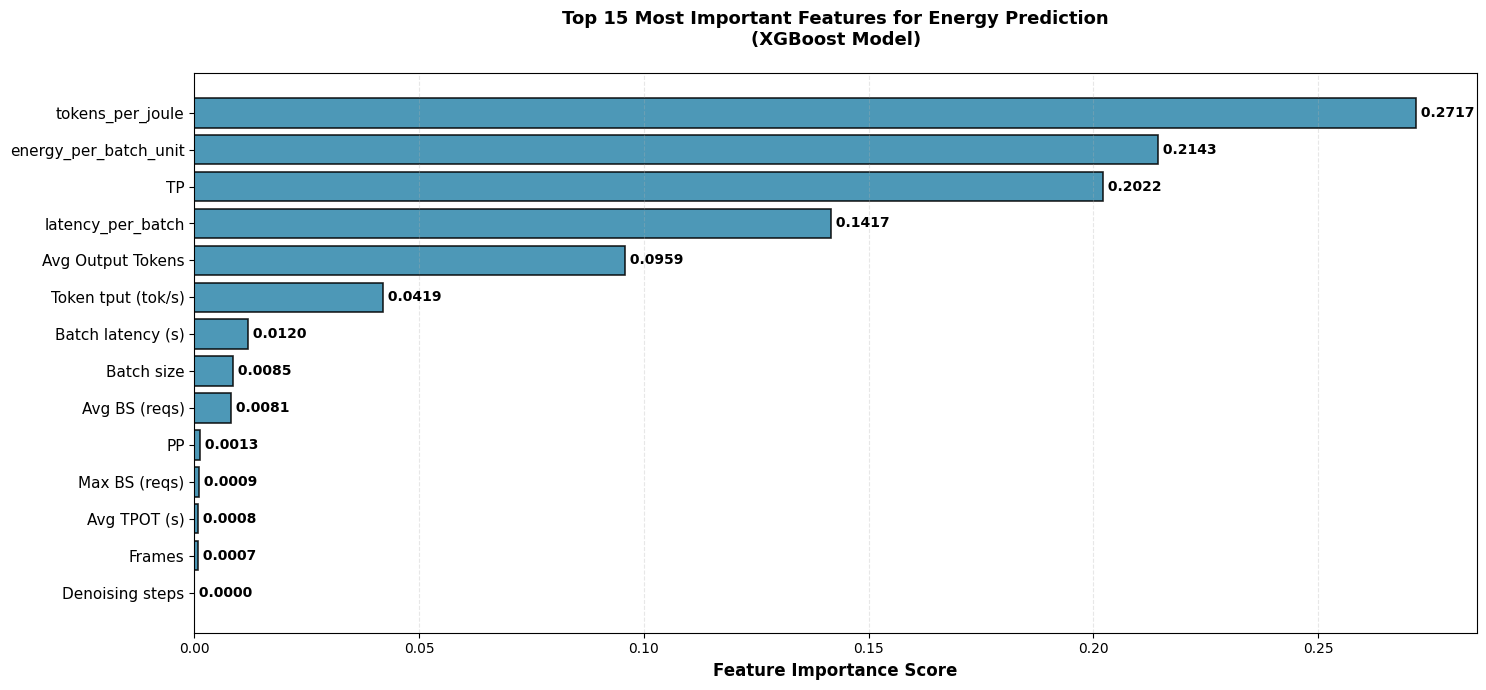

In [ ]:
# PLOT 2: TOP 15 FEATURE IMPORTANCE BAR CHART
top_features = feature_importance_df.head(15)

fig, ax = plt.subplots(figsize=(15, 7))

bars = ax.barh(range(len(top_features)), top_features['Importance'],
               color='#2E86AB', edgecolor='black', linewidth=1.2, alpha=0.85)

ax.set_yticks(range(len(top_features)))
ax.set_yticklabels(top_features['Feature'], fontsize=11)
ax.set_xlabel('Feature Importance Score', fontsize=12, fontweight='bold')
ax.set_title('Top 15 Most Important Features for Energy Prediction\n(XGBoost Model)',
             fontsize=13, fontweight='bold', pad=20)
ax.grid(axis='x', alpha=0.3, linestyle='--')

# Invert y-axis so highest importance is at top
ax.invert_yaxis()

# Add value labels on bars
for i, (bar, importance) in enumerate(zip(bars, top_features['Importance'])):
    width = bar.get_width()
    ax.text(width, bar.get_y() + bar.get_height()/2.,
            f' {importance:.4f}', ha='left', va='center', fontsize=10, fontweight='bold')

plt.tight_layout()
plt.savefig('feature_importance_top15.png', dpi=300, bbox_inches='tight')
plt.show()


**BUSINESS INSIGHTS FOR KPMG:**
1. TASK SEGMENTATION:
   - Different task types show distinct energy profiles
   - Optimization strategies should be task-specific

2. HARDWARE EFFICIENCY:
   - GPU tier significantly impacts energy consumption
   - Consider workload-GPU pairing for optimization

3. SCALING INSIGHTS:
   - Batch size and throughput are key efficiency drivers
   - Larger batches can improve energy efficiency

4. RECOMMENDATIONS:
   - Implement model-specific optimization strategies
   - Consider GPU selection based on workload characteristics
   - Batch request sizes to maximize throughput while managing latency
   - Monitor energy per request for continuous improvement

NEXT STEPS:
1. Validate findings on production workloads
2. Implement A/B testing for optimization strategies
3. Develop automated energy monitoring dashboard
4. Create task-GPU matching recommendations



BUSINESS INSIGHTS FOR KPMG:

1. TASK SEGMENTATION:
   - Different task types show distinct energy profiles
   - Optimization strategies should be task-specific

2. HARDWARE EFFICIENCY:
   - GPU tier significantly impacts energy consumption
   - Consider workload-GPU pairing for optimization

3. SCALING INSIGHTS:
   - Batch size and throughput are key efficiency drivers
   - Larger batches can improve energy efficiency

4. RECOMMENDATIONS:
   - Implement model-specific optimization strategies
   - Consider GPU selection based on workload characteristics
   - Batch request sizes to maximize throughput while managing latency
   - Monitor energy per request for continuous improvement

NEXT STEPS:
1. Validate findings on production workloads
2. Implement A/B testing for optimization strategies
3. Develop automated energy monitoring dashboard
4. Create task-GPU matching recommendations



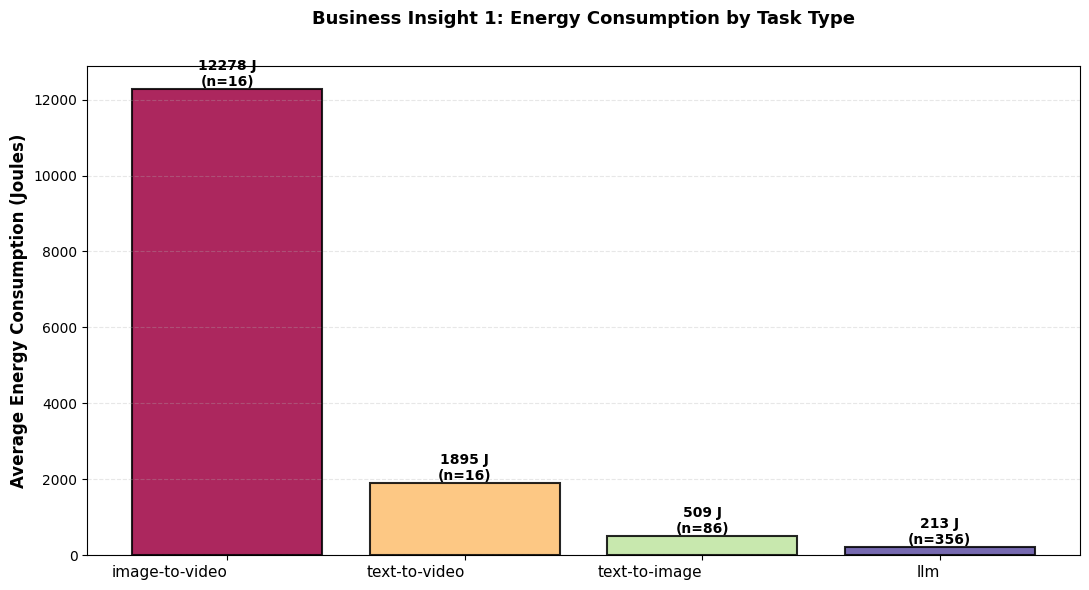

In [ ]:
# PLOT 3: BUSINESS INSIGHT #1 - ENERGY BY TASK TYPE
task_energy_stats = df_filtered.groupby('task_type').agg({
    'total_energy_j': ['mean', 'count']
}).round(2)

task_energy_stats.columns = ['Mean Energy', 'Sample Count']
task_energy_stats = task_energy_stats.sort_values('Mean Energy', ascending=False)

fig, ax = plt.subplots(figsize=(11, 6))

x_pos = np.arange(len(task_energy_stats))
means = task_energy_stats['Mean Energy'].values
colors_gradient = plt.cm.Spectral(np.linspace(0, 1, len(task_energy_stats)))

bars = ax.bar(x_pos, means, color=colors_gradient, edgecolor='black', linewidth=1.5, alpha=0.85)

for i, (bar, mean, count) in enumerate(zip(bars, means, task_energy_stats['Sample Count'].values)):
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height,
            f'{mean:.0f} J\n(n={int(count)})', ha='center', va='bottom',
            fontsize=10, fontweight='bold')

ax.set_xticks(x_pos)
ax.set_xticklabels(task_energy_stats.index, fontsize=11)
ax.set_ylabel('Average Energy Consumption (Joules)', fontsize=12, fontweight='bold')
ax.set_title('Business Insight 1: Energy Consumption by Task Type',
             fontsize=13, fontweight='bold', pad=30)
ax.grid(axis='y', alpha=0.3, linestyle='--')
plt.xticks(rotation=0, ha='right')

plt.tight_layout()
plt.show()

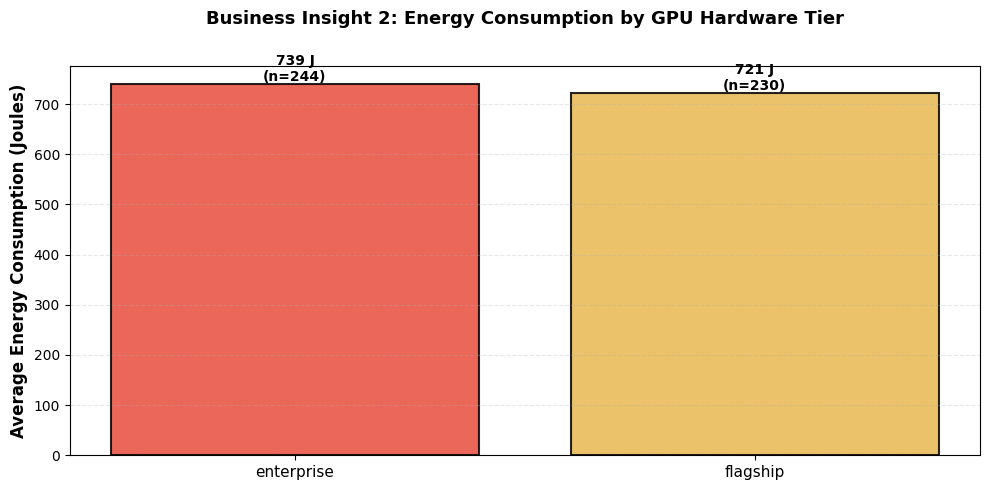

In [ ]:
# PLOT 4: BUSINESS INSIGHT #2 - ENERGY BY GPU TIER
gpu_energy_stats = df_filtered.groupby('gpu_tier').agg({
    'total_energy_j': ['mean', 'count']
}).round(2)

gpu_energy_stats.columns = ['Mean Energy', 'Sample Count']
gpu_energy_stats = gpu_energy_stats.sort_values('Mean Energy', ascending=False)

fig, ax = plt.subplots(figsize=(10, 5))

x_pos = np.arange(len(gpu_energy_stats))
means = gpu_energy_stats['Mean Energy'].values
colors_gpu = ['#E74C3C', '#E8B74F', '#52BE80', '#3498DB'][:len(gpu_energy_stats)]

bars = ax.bar(x_pos, means, color=colors_gpu, edgecolor='black', linewidth=1.5, alpha=0.85)

for bar, mean, count in zip(bars, means, gpu_energy_stats['Sample Count'].values):
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height,
            f'{mean:.0f} J\n(n={int(count)})', ha='center', va='bottom',
            fontsize=10, fontweight='bold')

ax.set_xticks(x_pos)
ax.set_xticklabels(gpu_energy_stats.index, fontsize=11)
ax.set_ylabel('Average Energy Consumption (Joules)', fontsize=12, fontweight='bold')
ax.set_title('Business Insight 2: Energy Consumption by GPU Hardware Tier',
             fontsize=13, fontweight='bold', pad=30)
ax.grid(axis='y', alpha=0.3, linestyle='--')

plt.tight_layout()
plt.savefig('business_insight_2_gpu_tier_energy.png', dpi=400, bbox_inches='tight')
plt.show()

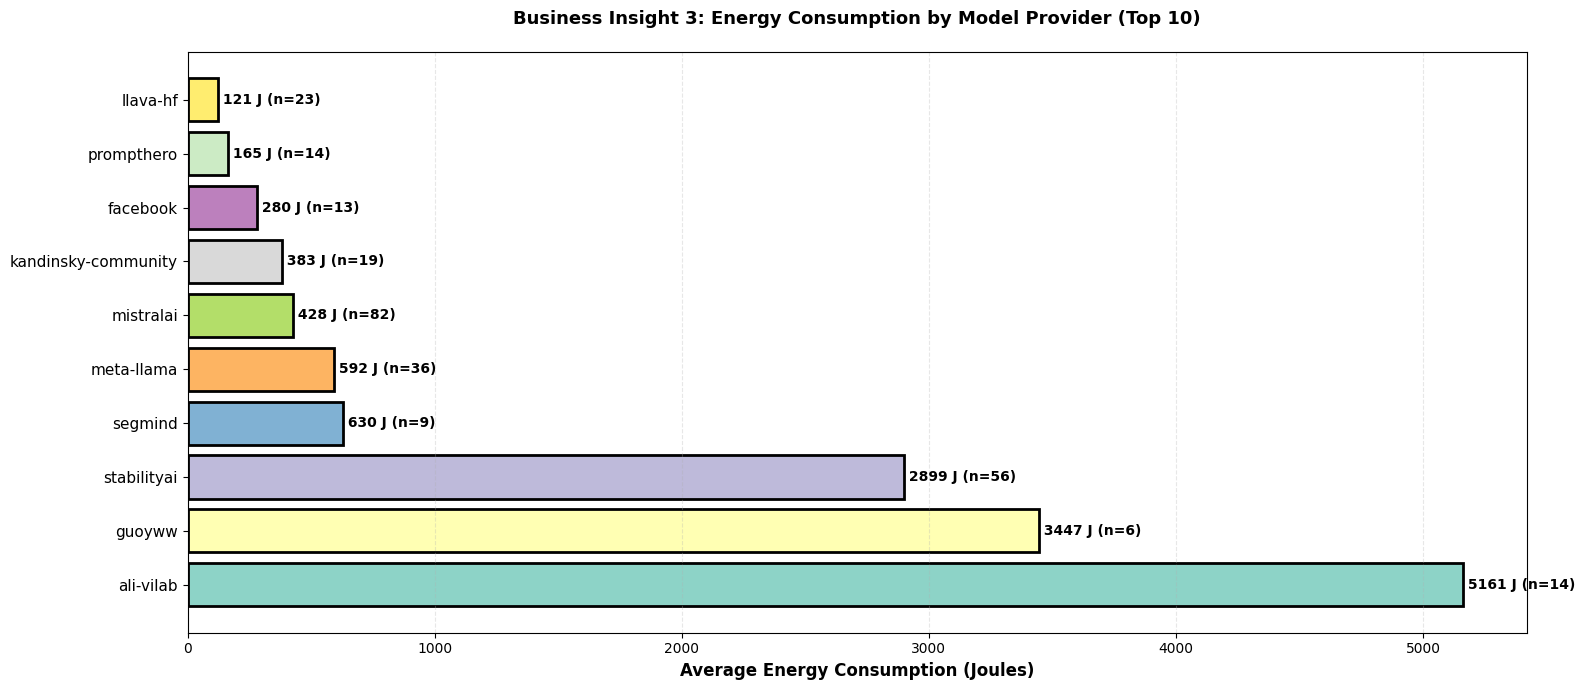

In [ ]:
# PLOT 5: BUSINESS INSIGHT #3 - ENERGY BY MODEL PROVIDER
provider_energy_stats = df_filtered.groupby('provider').agg({
    'total_energy_j': ['mean', 'count']
}).round(2)

provider_energy_stats.columns = ['Mean Energy', 'Sample Count']
provider_energy_stats = provider_energy_stats.sort_values('Mean Energy', ascending=False)
provider_energy_stats = provider_energy_stats.head(10)

fig, ax = plt.subplots(figsize=(16, 7))

x_pos = np.arange(len(provider_energy_stats))
means = provider_energy_stats['Mean Energy'].values
colors_provider = plt.cm.Set3(np.linspace(0, 1, len(provider_energy_stats)))

bars = ax.barh(x_pos, means, color=colors_provider, edgecolor='black', linewidth=2, alpha=1)

for bar, mean, count in zip(bars, means, provider_energy_stats['Sample Count'].values):
    width = bar.get_width()
    ax.text(width, bar.get_y() + bar.get_height()/2.,
            f' {mean:.0f} J (n={int(count)})', ha='left', va='center',
            fontsize=10, fontweight='bold')

ax.set_yticks(x_pos)
ax.set_yticklabels(provider_energy_stats.index, fontsize=11)
ax.set_xlabel('Average Energy Consumption (Joules)', fontsize=12, fontweight='bold')
ax.set_title('Business Insight 3: Energy Consumption by Model Provider (Top 10)',
             fontsize=13, fontweight='bold', pad=20)
ax.grid(axis='x', alpha=0.3, linestyle='--')

plt.tight_layout()
plt.savefig('business_insight_3_provider_energy.png', dpi=300, bbox_inches='tight')
plt.show()

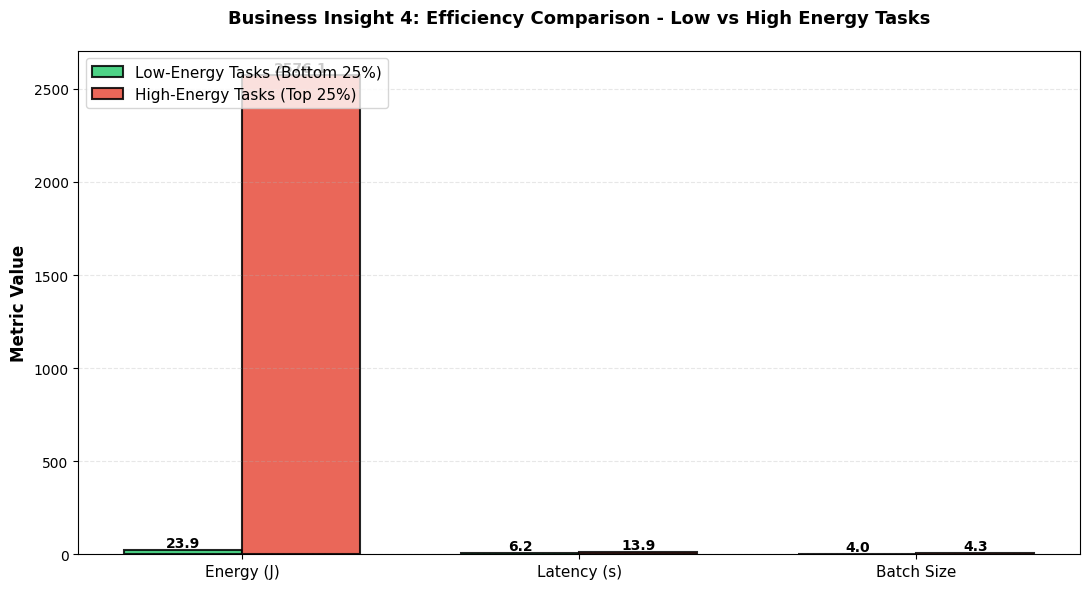

Saved: business_insight_4_efficiency_comparison.png


In [ ]:
# PLOT 6: BUSINESS INSIGHT #4 - EFFICIENCY COMPARISON HIGH vs LOW ENERGY
energy_quartiles = df_filtered['total_energy_j'].quantile([0.25, 0.75])
high_energy_tasks = df_filtered[df_filtered['total_energy_j'] > energy_quartiles[0.75]]
low_energy_tasks = df_filtered[df_filtered['total_energy_j'] <= energy_quartiles[0.25]]

efficiency_metrics = pd.DataFrame({
    'Low-Energy Tasks': [
        low_energy_tasks['total_energy_j'].mean(),
        low_energy_tasks['Batch latency (s)'].mean(),
        low_energy_tasks['Batch size'].mean()
    ],
    'High-Energy Tasks': [
        high_energy_tasks['total_energy_j'].mean(),
        high_energy_tasks['Batch latency (s)'].mean(),
        high_energy_tasks['Batch size'].mean()
    ]
}, index=['Energy (J)', 'Latency (s)', 'Batch Size'])

fig, ax = plt.subplots(figsize=(11, 6))

x_pos = np.arange(len(efficiency_metrics))
width = 0.35

bars1 = ax.bar(x_pos - width/2, efficiency_metrics['Low-Energy Tasks'], width,
               label='Low-Energy Tasks (Bottom 25%)', color='#2ECC71',
               edgecolor='black', linewidth=1.5, alpha=0.85)
bars2 = ax.bar(x_pos + width/2, efficiency_metrics['High-Energy Tasks'], width,
               label='High-Energy Tasks (Top 25%)', color='#E74C3C',
               edgecolor='black', linewidth=1.5, alpha=0.85)

for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., height,
                f'{height:.1f}', ha='center', va='bottom', fontsize=10, fontweight='bold')

ax.set_xticks(x_pos)
ax.set_xticklabels(efficiency_metrics.index, fontsize=11)
ax.set_ylabel('Metric Value', fontsize=12, fontweight='bold')
ax.set_title('Business Insight 4: Efficiency Comparison - Low vs High Energy Tasks',
             fontsize=13, fontweight='bold', pad=20)
ax.legend(fontsize=11, loc='upper left')
ax.grid(axis='y', alpha=0.3, linestyle='--')

plt.tight_layout()
plt.savefig('business_insight_4_efficiency_comparison.png', dpi=300, bbox_inches='tight')
plt.show()

In [ ]:
# CELL 29: BUSINESS INSIGHTS - ENERGY BY PROVIDER
# Model provider analysis
energy_by_provider = df_filtered.groupby('provider').agg({
    'total_energy_j': ['mean', 'median', 'count'],
    'Batch size': 'mean'
}).round(2)

print("\nTop 10 Providers by Sample Count:")
energy_by_provider.sort_values(('total_energy_j', 'count'), ascending=False).head(10)


Top 10 Providers by Sample Count:


total_energy_j                Batch size
                              mean   median count       mean
provider                                                    
mistralai                   427.96   273.65    82       4.00
google                       69.20    42.42    76       4.00
stabilityai                2898.71   831.78    56       8.86
codellama                    77.90    54.94    49       4.00
bigcode                      14.07    13.50    40       4.00
microsoft                    87.57    71.50    37       4.00
meta-llama                  592.10   347.96    36       4.00
llava-hf                    121.49   117.83    23       4.00
kandinsky-community         383.26   221.33    19      10.95
ali-vilab                  5161.49  1021.11    14       4.86

In [ ]:
# CELL 30: EFFICIENCY METRICS- Energy per unit throughput
# Calculate key efficiency metrics for KPMG recommendations

avg_energy = df_filtered['total_energy_j'].mean()
high_energy = df_filtered[df_filtered['total_energy_j'] > df_filtered['total_energy_j'].quantile(0.75)]
low_energy = df_filtered[df_filtered['total_energy_j'] <= df_filtered['total_energy_j'].quantile(0.25)]

print(f"\nAverage energy consumption: {avg_energy:.2f} J")
print(f"High-energy tasks (top 25%): {high_energy['total_energy_j'].mean():.2f} J")
print(f"Low-energy tasks (bottom 25%): {low_energy['total_energy_j'].mean():.2f} J")
print(f"Efficiency ratio (high/low): {high_energy['total_energy_j'].mean() / low_energy['total_energy_j'].mean():.2f}x")


Average energy consumption: 730.49 J
High-energy tasks (top 25%): 2576.13 J
Low-energy tasks (bottom 25%): 23.86 J
Efficiency ratio (high/low): 107.96x


In [ ]:
# Batch efficiency
print(f"\nAverage batch size: {df_filtered['Batch size'].mean():.2f}")
print(f"Average latency: {df_filtered['Batch latency (s)'].mean():.2f} seconds")
print(f"Average energy per batch unit: {df_filtered['energy_per_batch_unit'].mean():.2f} J")


Average batch size: 5.30
Average latency: 8.11 seconds
Average energy per batch unit: 233.94 J


In [ ]:
# CELL 31: SAVE PROCESSED DATA
# Save the cleaned and processed data for future analysis

df_processed = df_encoded[feature_cols + ['log_total_energy', 'total_energy_j']].copy()
df_processed.to_csv('kpmg_energy_processed_data.csv', index=False)
df_processed.shape

(474, 17)

In [ ]:
# 32: FINAL SUMMARY AND RECOMMENDATIONS
# Summary of findings and recommendations

print(f"""
MODEL PERFORMANCE:
✓ Best Model: XGBoost Regressor
✓ Test R² Score: {xgb_r2_test:.4f} (explains {xgb_r2_test*100:.1f}% of variance)
✓ Test RMSE: {xgb_rmse:.4f} (log units)
✓ Test MAE: {xgb_mae:.4f} (log units)

KEY DRIVERS OF ENERGY CONSUMPTION:
The top features predicting energy consumption are:
""")

for idx, row in feature_importance_df.head(5).iterrows():
    print(f"  • {row['Feature']}: {row['Importance']:.4f}")


MODEL PERFORMANCE:
✓ Best Model: XGBoost Regressor
✓ Test R² Score: 0.9968 (explains 99.7% of variance)
✓ Test RMSE: 0.0946 (log units)
✓ Test MAE: 0.0673 (log units)

KEY DRIVERS OF ENERGY CONSUMPTION:
The top features predicting energy consumption are:

  • tokens_per_joule: 0.2717
  • energy_per_batch_unit: 0.2143
  • TP: 0.2022
  • latency_per_batch: 0.1417
  • Avg Output Tokens: 0.0959


In [ ]:
# Get top 2 most frequent task types
top_tasks = df_filtered['task_type'].value_counts().head(2).index.tolist()

# Get top 2 most frequent model providers
top_providers = df_filtered['provider'].value_counts().head(2).index.tolist()

# Create pivot table: average energy consumption
decision_matrix = df_filtered[df_filtered['task_type'].isin(top_tasks) &
                               df_filtered['provider'].isin(top_providers)].copy()

pivot_energy = decision_matrix.pivot_table(
    values='total_energy_j',
    index='task_type',
    columns='provider',
    aggfunc='mean'
)

# Also create a sample count matrix for context
pivot_count = decision_matrix.pivot_table(
    values='total_energy_j',
    index='task_type',
    columns='provider',
    aggfunc='count'
)

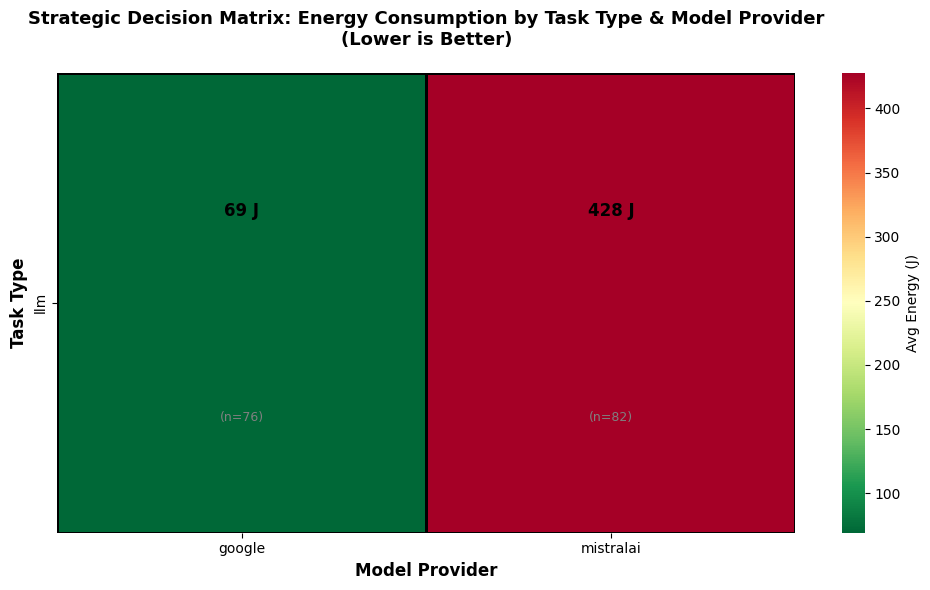

In [ ]:
# Plot 1: Energy Heatmap
fig, ax = plt.subplots(figsize=(10, 6))

sns.heatmap(pivot_energy, annot=False, cmap='RdYlGn_r',
            cbar_kws={'label': 'Avg Energy (J)'}, ax=ax,
            linewidths=2, linecolor='black')

# Add energy values as text
for i in range(len(pivot_energy.index)):
    for j in range(len(pivot_energy.columns)):
        energy_val = pivot_energy.iloc[i, j]
        count_val = pivot_count.iloc[i, j]
        ax.text(j + 0.5, i + 0.3, f'{energy_val:.0f} J',
               ha='center', va='center', fontsize=12, fontweight='bold', color='black')
        ax.text(j + 0.5, i + 0.75, f'(n={int(count_val)})',
               ha='center', va='center', fontsize=9, color='gray')

ax.set_xlabel('Model Provider', fontsize=12, fontweight='bold')
ax.set_ylabel('Task Type', fontsize=12, fontweight='bold')
ax.set_title('Strategic Decision Matrix: Energy Consumption by Task Type & Model Provider\n(Lower is Better)',
            fontsize=13, fontweight='bold', pad=20)

plt.tight_layout()
plt.savefig('decision_matrix_energy_heatmap.png', dpi=300, bbox_inches='tight')
plt.show()

In [ ]:
# Get top 2 GPU tiers
top_gpus = df_filtered['gpu_tier'].value_counts().head(2).index.tolist()

# Create pivot table: average energy consumption by task and GPU
decision_matrix_gpu = df_filtered[df_filtered['task_type'].isin(top_tasks) &
                                   df_filtered['gpu_tier'].isin(top_gpus)].copy()

pivot_energy_gpu = decision_matrix_gpu.pivot_table(
    values='total_energy_j',
    index='task_type',
    columns='gpu_tier',
    aggfunc='mean'
)

pivot_count_gpu = decision_matrix_gpu.pivot_table(
    values='total_energy_j',
    index='task_type',
    columns='gpu_tier',
    aggfunc='count'
)

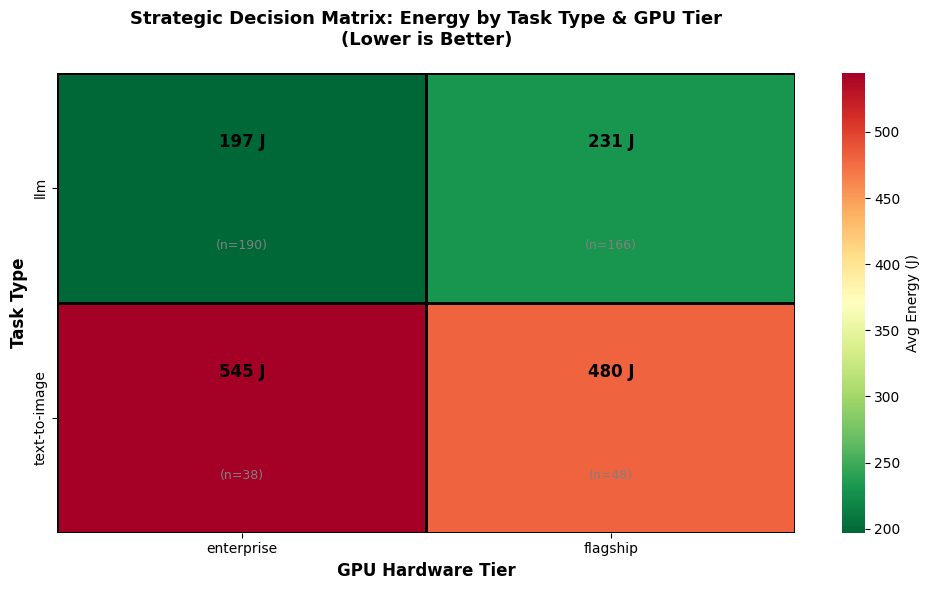

In [ ]:
# Plot 2: GPU Tier Decision Matrix
fig, ax = plt.subplots(figsize=(10, 6))

sns.heatmap(pivot_energy_gpu, annot=False, cmap='RdYlGn_r',
            cbar_kws={'label': 'Avg Energy (J)'}, ax=ax,
            linewidths=2, linecolor='black')

for i in range(len(pivot_energy_gpu.index)):
    for j in range(len(pivot_energy_gpu.columns)):
        energy_val = pivot_energy_gpu.iloc[i, j]
        count_val = pivot_count_gpu.iloc[i, j]
        ax.text(j + 0.5, i + 0.3, f'{energy_val:.0f} J',
               ha='center', va='center', fontsize=12, fontweight='bold', color='black')
        ax.text(j + 0.5, i + 0.75, f'(n={int(count_val)})',
               ha='center', va='center', fontsize=9, color='gray')

ax.set_xlabel('GPU Hardware Tier', fontsize=12, fontweight='bold')
ax.set_ylabel('Task Type', fontsize=12, fontweight='bold')
ax.set_title('Strategic Decision Matrix: Energy by Task Type & GPU Tier\n(Lower is Better)',
            fontsize=13, fontweight='bold', pad=20)

plt.tight_layout()
plt.savefig('decision_matrix_gpu_tier.png', dpi=300, bbox_inches='tight')
plt.show()